In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from pandas import to_datetime
import warnings
warnings.filterwarnings("ignore")

## Read data && get quick stats

In [2]:
df_sales = pd.read_csv('./datasets/supermarket_sales - Sheet1.csv')

In [3]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
df_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df_sales['Date'] = to_datetime(df_sales['Date'])
df_sales['Time'] = to_datetime(df_sales['Time'])

In [7]:
df_sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [8]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-08 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-08 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-08 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## 1st approach to get dates attribute

In [9]:
def fetch_dt_attr(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day, month, year])

In [10]:
df_sales['Date'].apply(fetch_dt_attr)

,0,1,2
0,5,1,2019
1,8,3,2019
2,3,3,2019
3,27,1,2019
4,8,2,2019
...,...,...,...
995,29,1,2019
996,2,3,2019
997,9,2,2019
998,22,2,2019


In [11]:
df_sales[['day', 'month', 'year']] = df_sales['Date'].apply(fetch_dt_attr)

In [12]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-08 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-08-08 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-08-08 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-08-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


## 2nd approach to get dates attribute

In [13]:
df_sales['Date'].apply(lambda x:x.day)

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

## 3rd approach to get dates attribute

In [14]:
df_sales['Date'].dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [15]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year'],
      dtype='object')

In [16]:
df_sales['Hour'] = df_sales['Time'].apply(lambda x:x.hour)
df_sales['Min'] = df_sales['Time'].apply(lambda x:x.min)
# df_sales['Sec'] = df_sales['Time'].apply(lambda x:x.sec)



## Statistical && Correlation Analysis

In [17]:
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [18]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,0.835254,1.000000,1.000000,2.000000,3.000000,3.000000


In [19]:
df_sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588
day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762


In [20]:
np.round(df_sales.corr(), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


<AxesSubplot:>

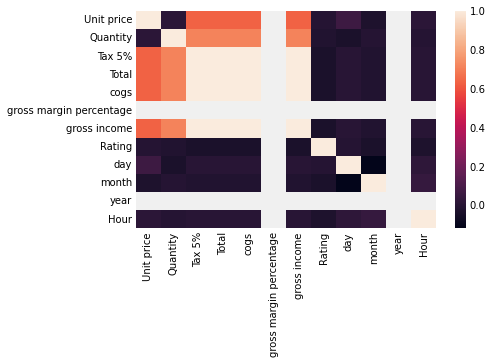

In [21]:
sns.heatmap(np.round(df_sales.corr(), 2))

<AxesSubplot:>

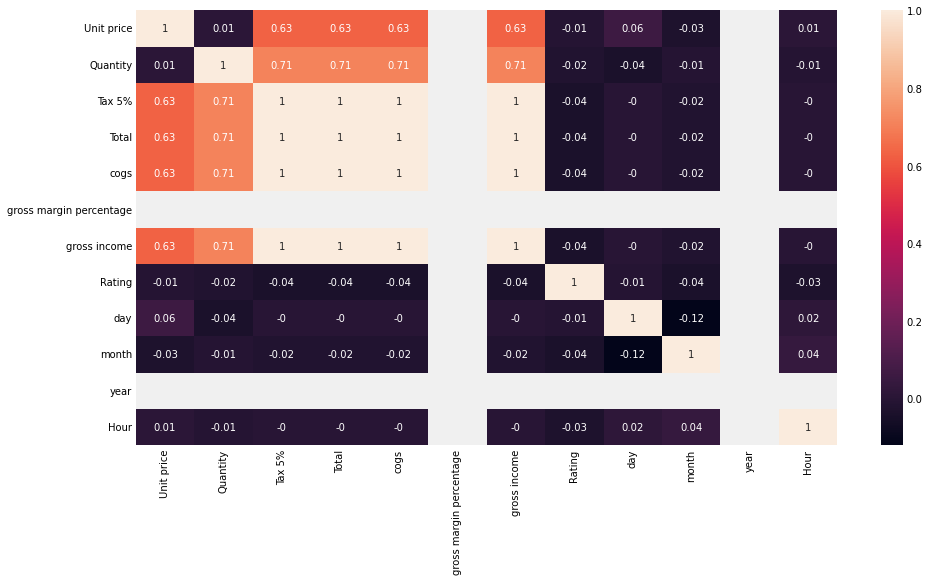

In [22]:
plt.figure(figsize=(14, 8))
sns.heatmap(np.round(df_sales.corr(), 2), annot=True)

<AxesSubplot:xlabel='Tax 5%', ylabel='gross income'>

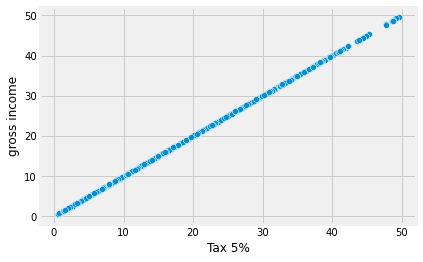

In [23]:
sns.scatterplot(x='Tax 5%', y='gross income', data=df_sales)

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

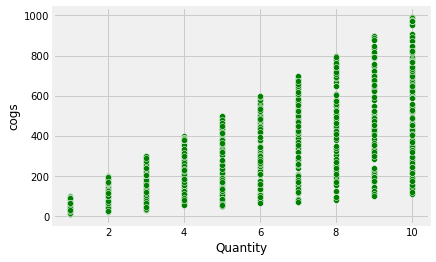

In [24]:
sns.scatterplot(x='Quantity', y='cogs', data=df_sales, color='green')

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

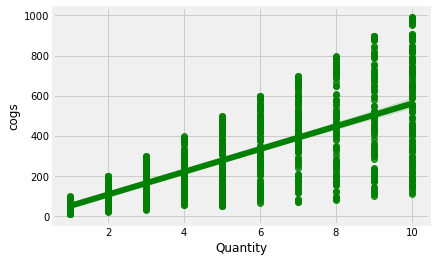

In [25]:
sns.regplot(x='Quantity', y='cogs', data=df_sales, color='green')

## Problem Statements:
- Find if relationship between data
- which city has more Gross Income
- Find Mean Rating && Visulalize it

<AxesSubplot:xlabel='Tax 5%', ylabel='Total'>

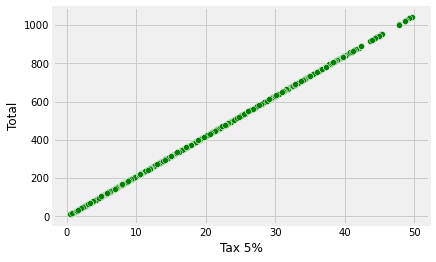

In [26]:
# Find if relationship between data
sns.scatterplot(x='Tax 5%', y='Total', data=df_sales, color='green')

Anwswer:
- If 'Tax 5%' increases, the 'Total' also increase in the same factor.

In [27]:
# Which city has more gross income
df_sales['City'].unique()
#Two ways:
# 1) Filter: by city and get median sales
# 2) Groupby: compute a median of the gross income
# PS: prefer to use median to compute this tipe of operations to avoid 'outliers' in the data

df_sales.groupby(['City'])['gross income'].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross income, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

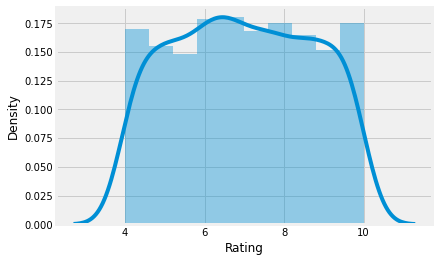

In [28]:
# Find Mean Rating && Visulalize it
sns.distplot(df_sales['Rating'])

Sales Rating mean:  6.9727


<AxesSubplot:xlabel='Rating'>

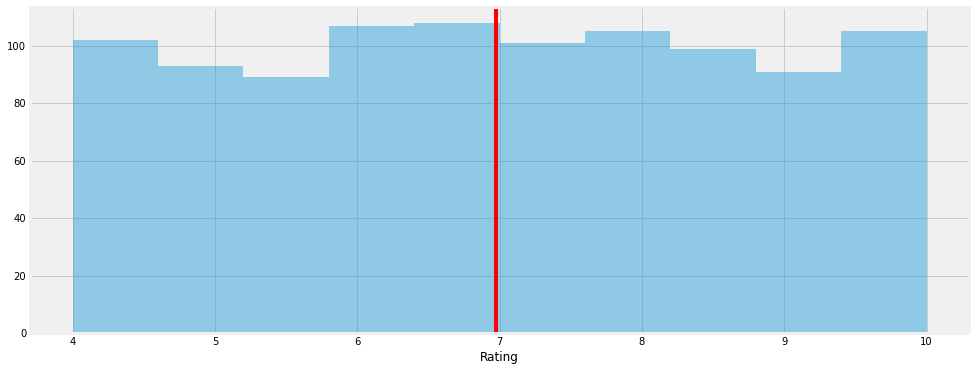

In [29]:
print('Sales Rating mean: ',df_sales['Rating'].mean())
plt.figure(figsize=(15, 6))
plt.axvline(x=np.mean(df_sales['Rating']), c='red', label='Avg rating')
sns.distplot(df_sales['Rating'], kde=False)

## Problem Statements:
- Define Custum Functions

In [30]:
# Return the distribution of a given feature: Gender, Payment, City

def return_countplot(column, hue_name=None):
    return sns.countplot(x=column, data=df_sales, hue=hue_name)

In [31]:
def return_boxplot(x_column, y_column):
    return sns.boxplot(x=x_column, y=y_column, data=df_sales)

In [32]:
def return_lineplot(x_column, y_column):
    return sns.lineplot(x=x_column, y=y_column, data=df_sales)

### Sales:
- Each branch
- Each Month

In [33]:
# Two ways:

# 1) filter => cond: (branch == > && month == 'march')
# 2) Relation plot

## Implement Relation plot

In [34]:
def return_rel_plot(x_col, y_col, col_name=None, 
                    row_name=None, rel_type=None, hue_name=None,
                    style_name=None):
    return sns.relplot(x=x_col, y=y_col, col=col_name, row=row_name, kind=rel_type, hue=hue_name, style=style_name, data=df_sales)

### Problem Statements:
- Analysing the distribution of various branches
- Analysing trend of sales
- How much sales occurs in each & every branch with respect to each & every month

In [35]:
# Two ways:
# 1) Distplot
# 2) Boxplot (alows discriptive stats, along with the distribution)

#### Analysing the distribution of various branches

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

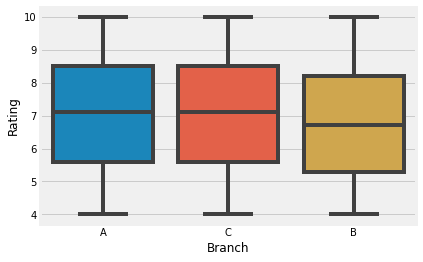

In [36]:
return_boxplot('Branch', 'Rating') # this automatically gives us the 5-point status summary, i.e, 
                                   # Min, 25th%, 50th%, 75th% and the Max

#### Analysing trend of sales

<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

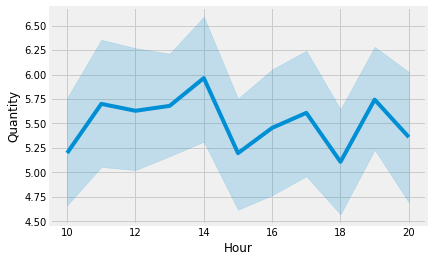

In [37]:
return_lineplot('Hour', 'Quantity')

#### How much sales occurs in each & every branch with respect to each & every month

In [38]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'Hour', 'Min'],
      dtype='object')

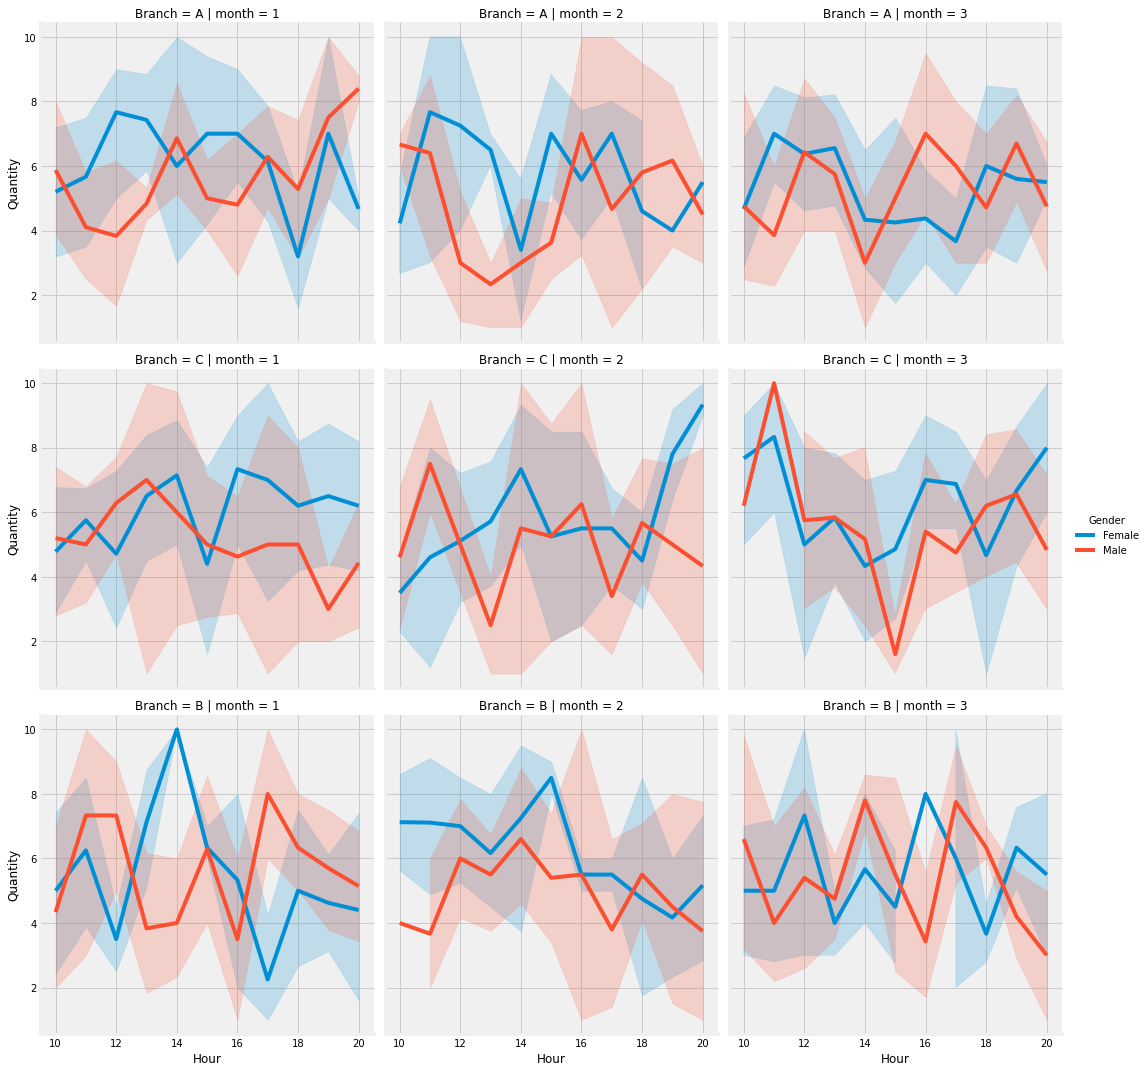

In [39]:
return_rel_plot(x_col='Hour', y_col='Quantity', col_name='month', row_name='Branch', rel_type='line', hue_name='Gender')

In [40]:
# We can see in the first chart that women do their purchases early in the morning
# while males prefer to go later in the day.

## Problem Statements:
- Analysing branche total sales per hour in a monthly fashion
- When customers buy certain products in the various branches
- Perform Product Analysis

#### Analysing branch total sales per hour in a monthly fashion

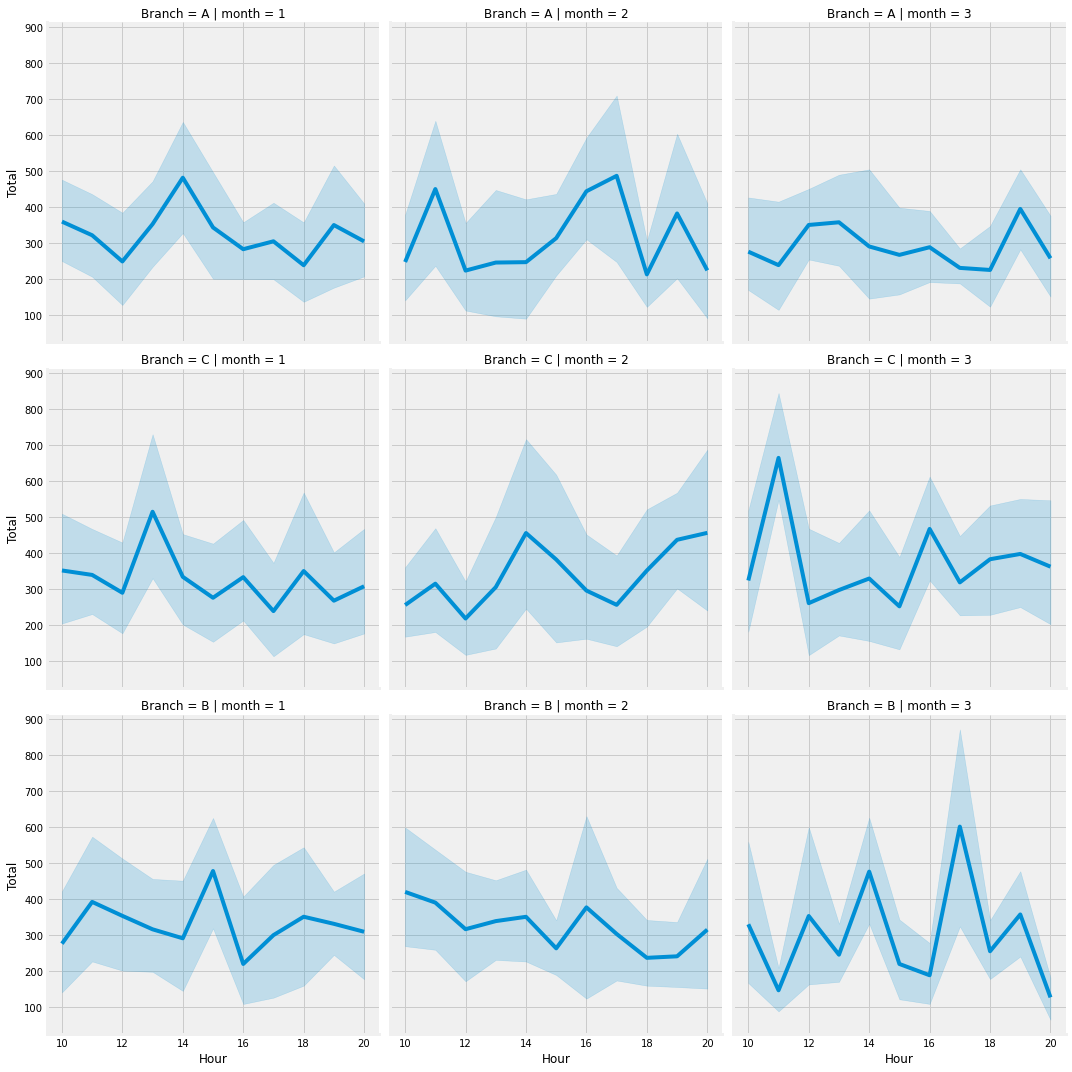

In [41]:
return_rel_plot(x_col='Hour', y_col='Total', col_name='month', row_name='Branch', rel_type='line')

In [42]:
# Branch = B | Month = 3
# We can identify a spike late in the day (evening hours)

#### When customers buy certain products in the various branches

In [43]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'Hour', 'Min'],
      dtype='object')

In [44]:
df_sales['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

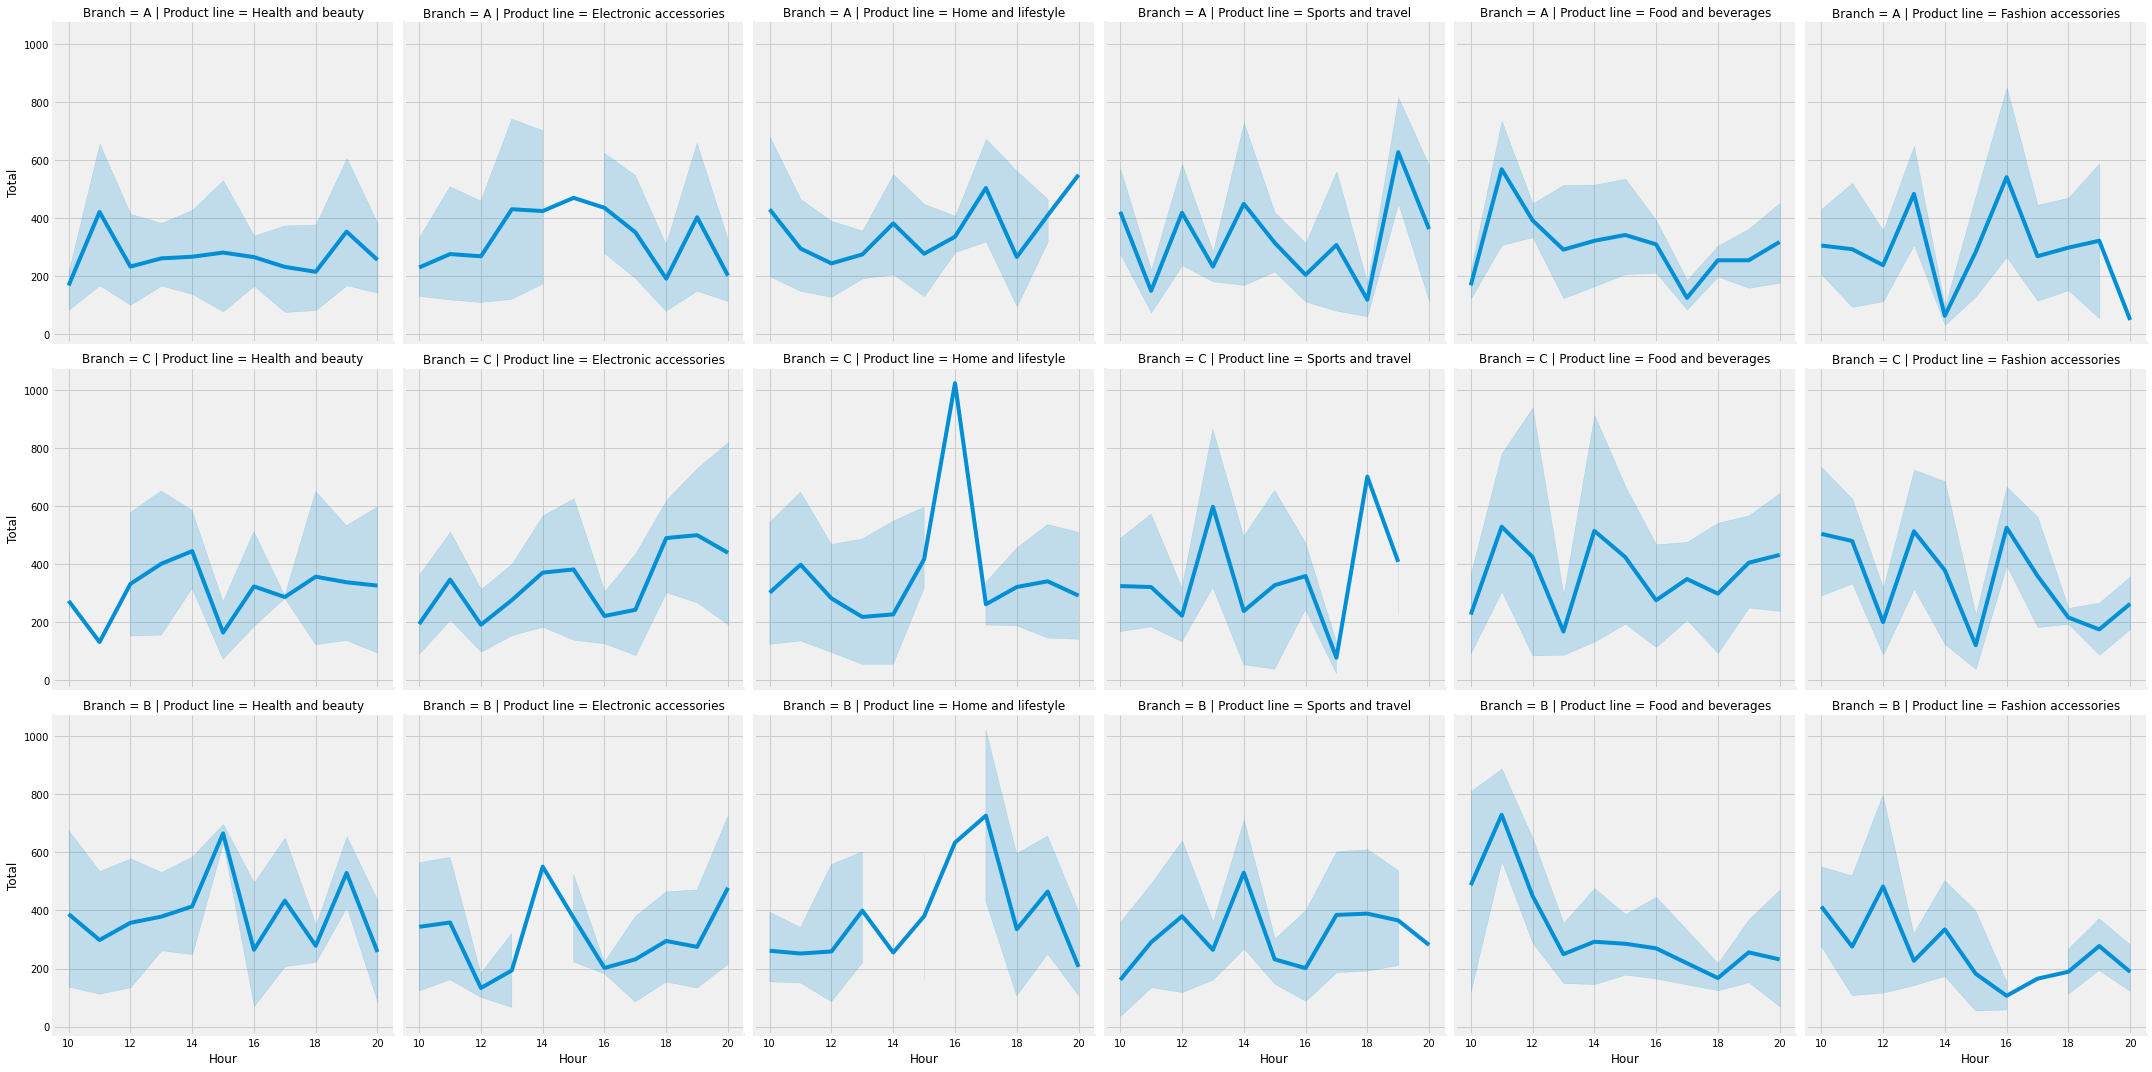

In [45]:
return_rel_plot(x_col='Hour', y_col='Total', col_name='Product line', row_name='Branch', rel_type='line')

#### Perform Product Analysis

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

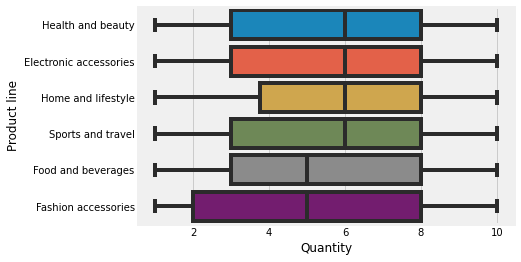

In [46]:
return_boxplot('Quantity', 'Product line')

#### Which products get sold more?

<AxesSubplot:xlabel='Product line', ylabel='count'>

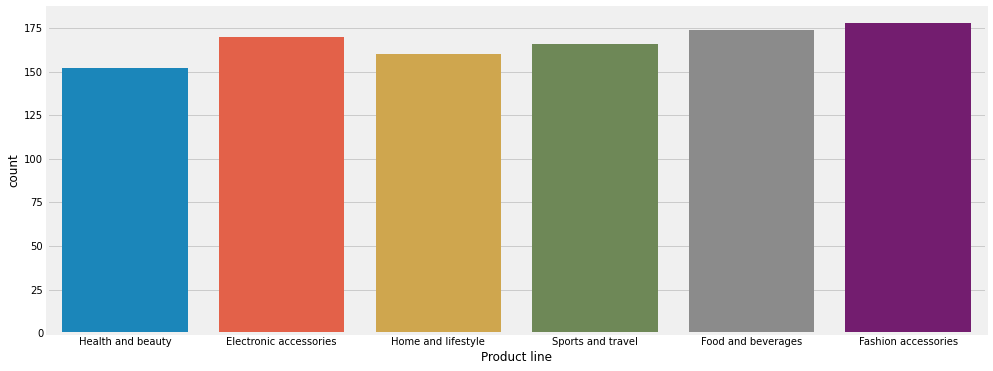

In [47]:
plt.figure(figsize=(15,6))

return_countplot('Product line')

## Problem Statements:
- Find the relationship between gross income & product line?
- How customers make payments n this business?
- Does Customer type influences the sales?

#### Find the relationship between gross income & product line?

In [48]:
# 1) Rel plot with scatter plot
# 2) sns.scatter using plotly or matplotlib

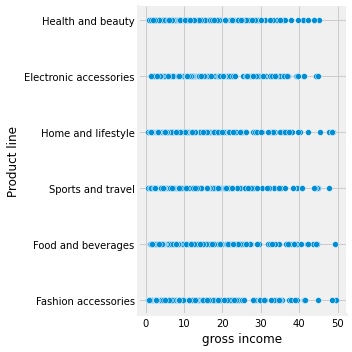

In [49]:
return_rel_plot('gross income', 'Product line', rel_type='scatter')

In [50]:
# It shows that persons that are going to purchase in the "Fashion acessories" category
# have a maximum gross income. The same conclusion can be thought of the persons buying in 
# the "Home and lifestyle" category.

#### How customers make payments n this business?

In [51]:
# 1) Barchart
# 2) PieChart
# 3) countplot

<AxesSubplot:xlabel='Payment', ylabel='count'>

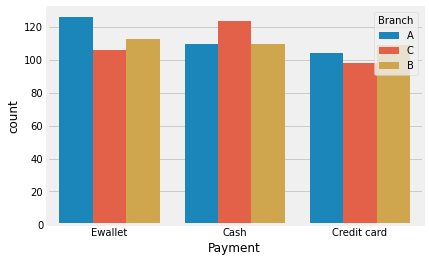

In [52]:
return_countplot('Payment', hue_name='Branch')

#### Does Customer type influences the sales?

In [53]:
df_sales.groupby(['Customer type'])['Total'].sum() # This returns a Series obj

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [54]:
# There's not too much difference between the member & non-member in terms of sales. 

In [55]:
df_sales.groupby(['Customer type']).agg({'Total': 'sum'}) # This returns a DataFrame obj

,Total
Customer type,
Member,164223.444
Normal,158743.305


# WordCloud Analysis

## Problem Statements:
- Do the customer type influence the customer rating?
- Most favorite products of users

#### Do the customer type influence the customer rating?

In [56]:
# 1) Use Distibution plot
# 2) Boxplot
# 3) Swarmplot (returns a distribution of the data points)

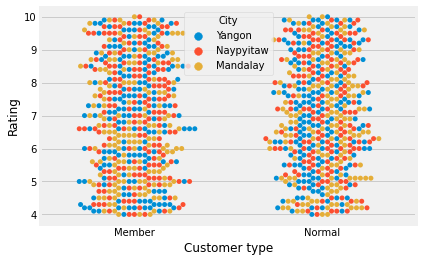

In [57]:
# plt.figure(figsize=(16, 8))
sns.swarmplot(x='Customer type', y='Rating', data=df_sales, hue='City')
plt.show()

In [58]:
# My Customer type will not affect Rating because my upper bar in both cases is slightly close
# to 10. That's basically a meaningful insight from this analysis.

#### Most favorite products of users

In [59]:
# 1) Wordcloud
# 2) plots (barchart)

In [60]:
# !pip install wordcloud

In [61]:
from wordcloud import WordCloud

In [62]:
' '.join(df_sales['Product line'])

'Health and beauty Electronic accessories Home and lifestyle Health and beauty Sports and travel Electronic accessories Electronic accessories Home and lifestyle Health and beauty Food and beverages Fashion accessories Electronic accessories Electronic accessories Food and beverages Health and beauty Sports and travel Health and beauty Sports and travel Food and beverages Home and lifestyle Electronic accessories Health and beauty Home and lifestyle Electronic accessories Sports and travel Home and lifestyle Fashion accessories Fashion accessories Food and beverages Health and beauty Fashion accessories Sports and travel Sports and travel Health and beauty Food and beverages Sports and travel Sports and travel Electronic accessories Health and beauty Home and lifestyle Home and lifestyle Home and lifestyle Sports and travel Food and beverages Health and beauty Electronic accessories Health and beauty Food and beverages Electronic accessories Fashion accessories Food and beverages Food 

In [63]:
wordcloud = WordCloud(width=1920, height=1080).generate(' '.join(df_sales['Product line']))

(-0.5, 1919.5, 1079.5, -0.5)

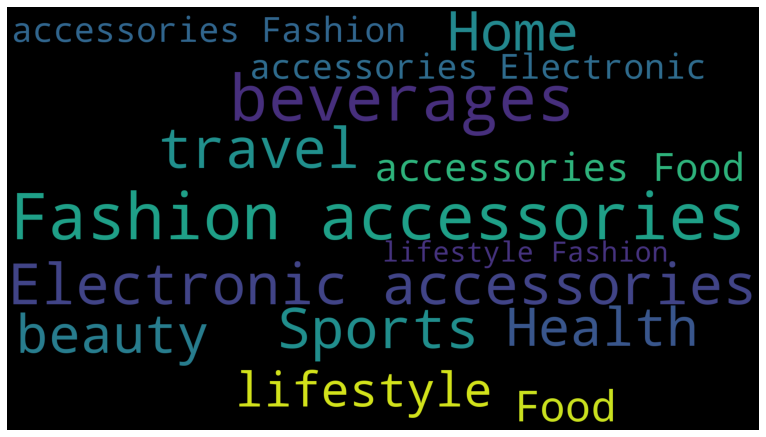

In [64]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.grid(None)
plt.axis('off')

In [65]:
# These are the products our customers will be emphasize more. These products are primarily related to my
# "fashion" products and also "health accessories and lifestyle"

In [ ]:
### These are the insights where your can focus more so you can increase your Revenue.